## Observations and Insights 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study
mouse_study.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [80]:
# Checking the number of mice.
num_mice = len(pd.unique(mouse_study['Mouse ID']))
print(f"Number of Mice: {num_mice}")

Number of Mice: 249


In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

###############################################
# I don't know how to just pull this by the IDs
###############################################

In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice
dup_list = list(dup_mice.index.values)
print(dup_list)

[861, 863, 865, 867, 869]


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_ms = mouse_study.drop(mouse_study.index[[dup_list]])
clean_ms

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [84]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(pd.unique(clean_ms['Mouse ID']))
print(f"Number of Mice: {new_num_mice}")

Number of Mice: 249


## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
dr_group = clean_ms[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])
dr_mean = dr_group["Tumor Volume (mm3)"].mean()
dr_median = dr_group["Tumor Volume (mm3)"].median()
dr_variance = dr_group["Tumor Volume (mm3)"].var()
dr_stdv = dr_group["Tumor Volume (mm3)"].std()
dr_sem = dr_group["Tumor Volume (mm3)"].sem()

drug_reg_summary = pd.DataFrame({"Mean": dr_mean, "Median": dr_median, "Variance": dr_variance, "Standard Deviation": dr_stdv, "SEM": dr_sem})
drug_reg_summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_summary_two = clean_ms.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Standard_Deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem'))

drug_reg_summary_two.head()

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

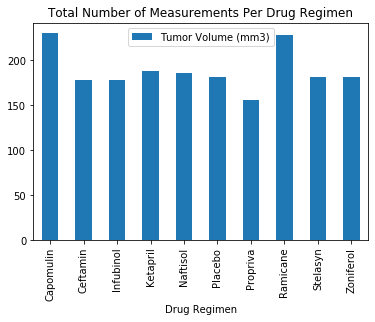

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measurements = pd.DataFrame(dr_group.count())
num_measurements.plot(kind="bar", title="Total Number of Measurements Per Drug Regimen")
plt.show()

Text(0.5, 1.0, 'Total Number of Measurements Per Drug Regimen')

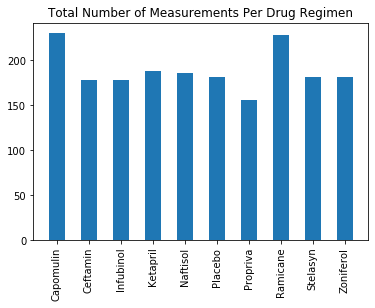

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
num_measurements_list = num_measurements["Tumor Volume (mm3)"].tolist()
x_axis = np.arange(len(num_measurements_list))

plt.bar(x_axis, num_measurements_list, width=0.5)

tick_locations = [value for value in x_axis]
drug_regimens = list(num_measurements.index.values)
plt.xticks(tick_locations, drug_regimens, rotation='vertical')
plt.title("Total Number of Measurements Per Drug Regimen")

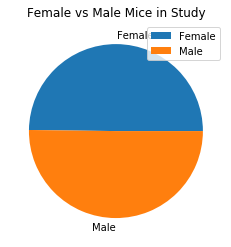

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
single_mice = mouse_study.drop_duplicates(subset=['Mouse ID'])
sex_count = pd.DataFrame(single_mice[["Sex", "Mouse ID"]].groupby(["Sex"]).count())
sex_count

count_pie = sex_count.plot(kind="pie", y="Mouse ID", title="Female vs Male Mice in Study")
count_pie.set_ylabel("")
plt.show()

Text(0.5, 1.0, 'Female vs Male Mice in Study')

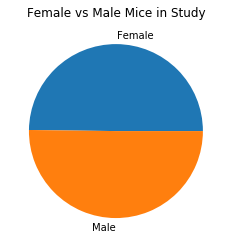

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

counts = pd.DataFrame(single_mice[["Sex", "Mouse ID"]].groupby(["Sex"]).count())['Mouse ID'].tolist()

plt.pie(counts, labels=labels)
plt.title("Female vs Male Mice in Study")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
